In [1]:
## Importing required libraries
## Setting warning to False
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
## Read the required data
auto = pd.read_csv("CarPrice_Assignment.csv", index_col = False)

### Data Exploration

1.) Checking Null Values

2.) Data type of each column

3.) Number of Unique values in each column

4.) Shape of dataset

In [3]:
## Checking the shape
auto.shape

(205, 26)

In [4]:
## Checking the number of Null values in each column
auto.isnull().sum()
## The data looks pretty clean in terms of Null Values
## There are no null values in any column

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
## Checking the dtype of each column
auto.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
## Checking the number of unique value in each column
auto.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

#### There is no column with only 1 unique value. Hence we will use all of them as of now

In [7]:
auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Data Processing

#### Generating variable `Brand name` from `Car Name`

In [8]:
## Creating the `brand name` variable
## Dropping the `car name` variable as well
auto["brand_name"] = auto["CarName"].apply(lambda x: x.split("-")[0])
auto.drop("CarName", axis=1, inplace= True)

In [9]:
## Exploring the brand name column
auto.brand_name.value_counts()

toyota corolla               6
toyota corona                6
peugeot 504                  6
mazda rx                     4
subaru dl                    4
toyota mark ii               3
honda civic                  3
mazda 626                    3
isuzu D                      3
alfa                         3
mitsubishi outlander         3
mitsubishi mirage g4         3
mitsubishi g4                3
honda accord                 2
nissan clipper               2
volkswagen dasher            2
audi 100ls                   2
subaru                       2
toyota corolla liftback      2
saab 99e                     2
nissan rogue                 2
volvo 144ea                  2
saab 99gle                   2
bmw x3                       2
saab 99le                    2
bmw 320i                     2
nissan latio                 2
mazda glc deluxe             2
toyota starlet               2
plymouth fury iii            2
                            ..
toyota celica gt liftback    1
plymouth

In [10]:
## From above its clear that we need to consider only first word for brand name
auto["brand_name"] = auto["brand_name"].apply(lambda x: x.split(" ")[0].lower())

In [11]:
## Checking brand names again
auto.brand_name.value_counts()

toyota        31
nissan        18
mazda         15
mitsubishi    13
honda         13
subaru        12
volvo         11
peugeot       11
dodge          9
volkswagen     9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        4
isuzu          4
jaguar         3
chevrolet      3
alfa           3
maxda          2
vw             2
renault        2
porcshce       1
toyouta        1
mercury        1
vokswagen      1
Name: brand_name, dtype: int64

In [12]:
## We need to perform additional cleaning on brand name for the below brands:
## 1.) toyota
## 2.) mazda
## 3.) volkswagen
## 4.) Porsche
auto["brand_name"] = auto["brand_name"].replace("maxda", "mazda").replace("toyouta", "toyota").replace("porcshce", "porsche")
auto["brand_name"] = auto["brand_name"].replace("vokswagen", "volkswagen").replace("vw", "volkswagen")

In [13]:
## Checking brand names again
auto.brand_name.value_counts()

## This time `brand name` looks pretty clean

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
volvo         11
peugeot       11
dodge          9
buick          8
bmw            8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
jaguar         3
alfa           3
chevrolet      3
renault        2
mercury        1
Name: brand_name, dtype: int64

In [14]:
## Dropping the `car_id` variable since it can't be used for analysis
auto.drop("car_ID", axis=1, inplace= True)

In [15]:
## We can map `cylindernumber` and `doornumber` to numeric values.
## Lets do it one by one
## For Cylindernumber, checking the valuecounts
print(auto.cylindernumber.value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [16]:
## Mapping it with numeric values so that it makes sense
cyl_num = {"one":1, "two":2, "three":3, "four":4, "five":5, "six":6, "seven":7, \
           "eight":8, "nine":9, "ten":10, "eleven":11, "twelve":12}
auto.cylindernumber = pd.to_numeric(auto.cylindernumber.map(cyl_num))

In [17]:
## For Cylindernumber, checking the valuecounts after mapping
print(auto.cylindernumber.value_counts())

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64


In [18]:
## For doornumber, checking the valuecounts
print(auto.doornumber.value_counts())

four    115
two      90
Name: doornumber, dtype: int64


In [19]:
## Mapping it with numeric values so that it makes sense
cyl_num = {"one":1, "two":2, "three":3, "four":4}
auto.doornumber = pd.to_numeric(auto.doornumber.map(cyl_num))

In [20]:
## For doornumber, checking the valuecounts after mapping
print(auto.doornumber.value_counts())

4    115
2     90
Name: doornumber, dtype: int64


In [21]:
## Listing down Categorical variables for which we need to create dummies:
cat_cols = ["brand_name", "fueltype", "aspiration", "carbody", \
            "drivewheel", "enginelocation", "enginetype", \
            "fuelsystem"]

num_cols = list(auto.drop(cat_cols, axis=1).columns)

In [22]:
## Printing the number of numeric columns
len(num_cols)

17

## Understanding the Data

In [23]:
### Checking the summary for the numeric columns
auto[num_cols].describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### From above its clear that we need to do scaling for the above numeric variables

#### Visualisation

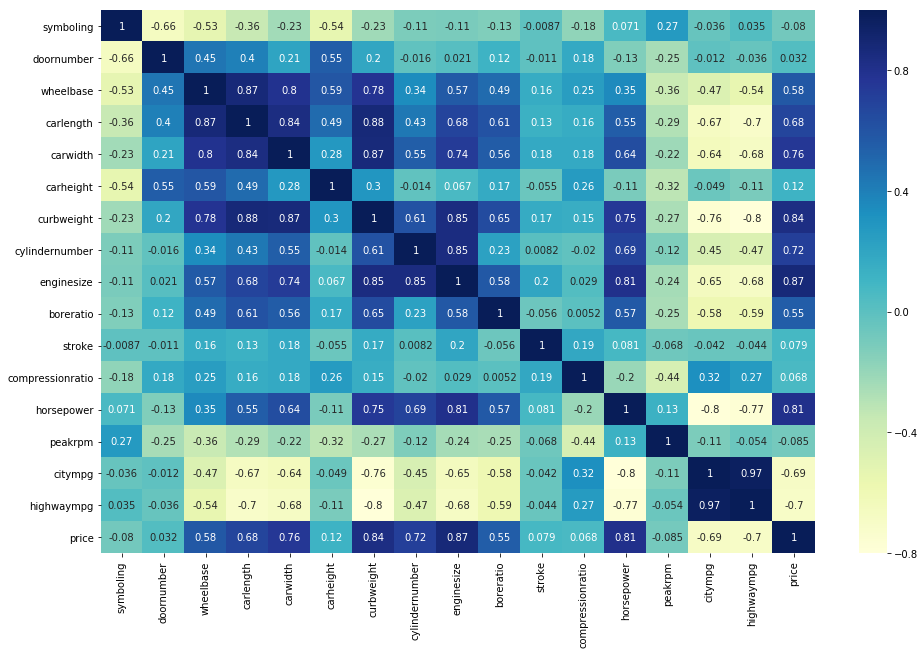

In [24]:
## Checking the heatmap for correlation
plt.figure(figsize = (16, 10))
sns.heatmap(auto[num_cols].corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From above heatmap its clear that

1.) `Price` is highly positively correlated with `carwidth`, `curbweight`, `enginesize`, `horsepower`

2.) `Price` has moderate positice correlation with `wheelbase`, `carlength`, `boreratio`, `cylindernumber`

3.) `Price` has high negative correlation with `citympg` and `highwaympg`

In [25]:
cat_cols

['brand_name',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

#### Visualizing the categorical variables as well

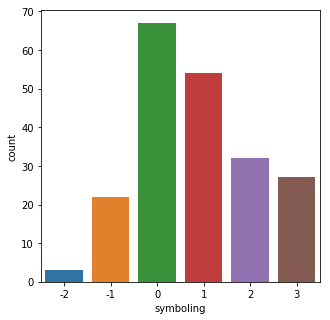

In [26]:
## Checking for symboling
plt.figure(figsize=(5, 5))
sns.countplot("symboling", data=auto)
plt.show()

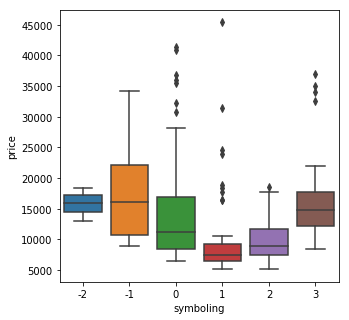

In [27]:
## Checking for impact of symboling
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'symboling', y = 'price', data = auto)
plt.show()

#### Quite obvious that vehicle with negative ratings (LESS RISKY) have high price

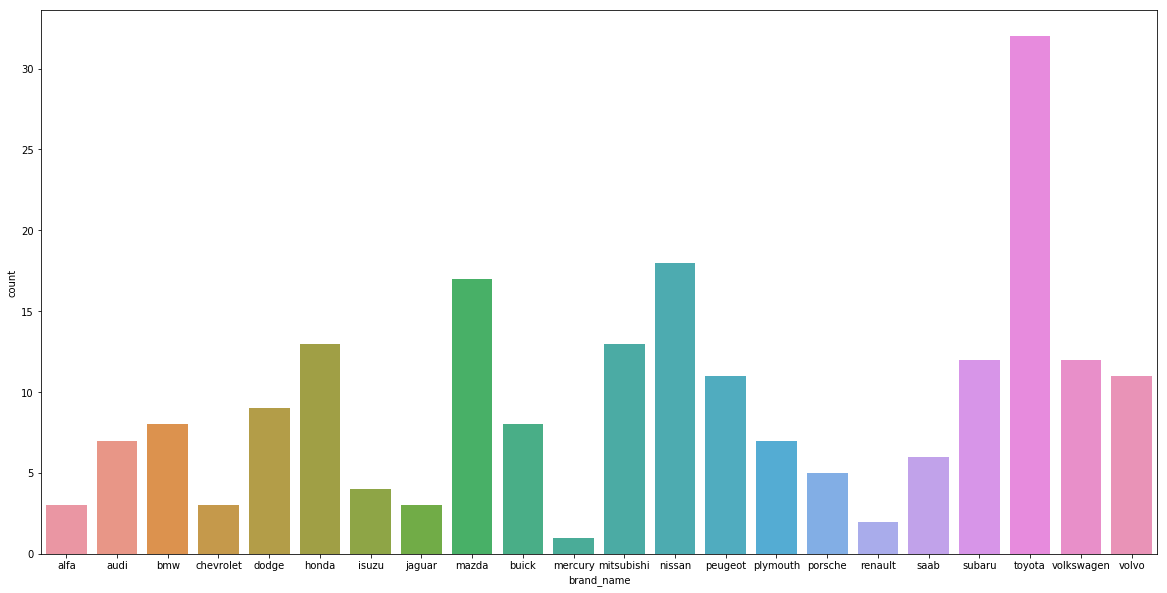

In [28]:
## Checking the frequency for brand of cars
plt.figure(figsize=(20, 10))
sns.countplot("brand_name", data=auto)
plt.show()

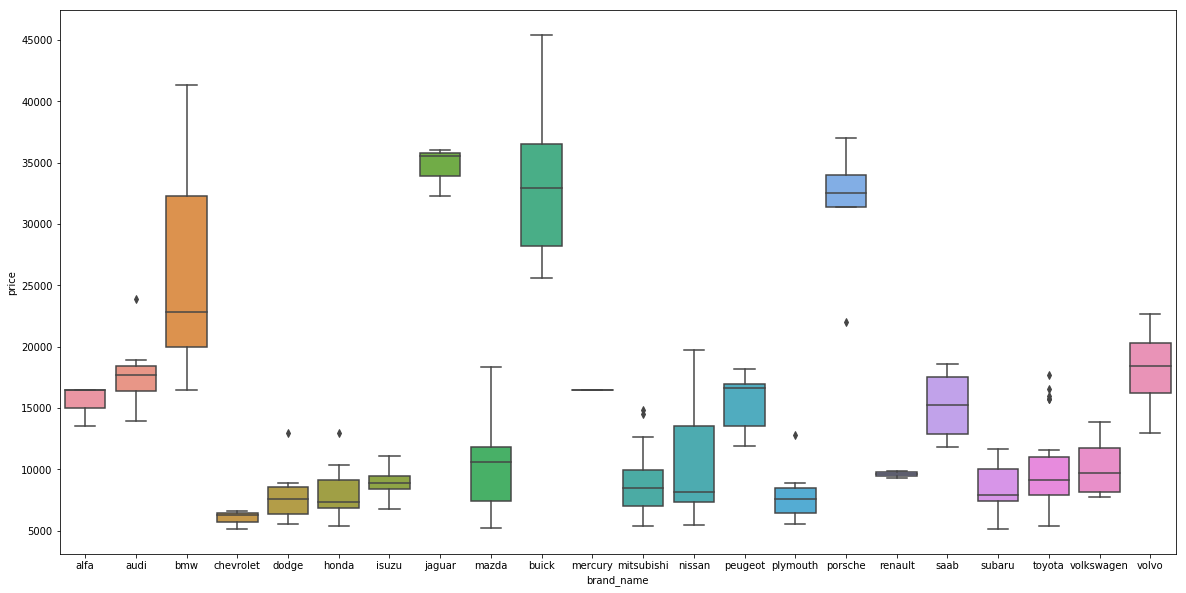

In [29]:
## Impact of brand
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'brand_name', y = 'price', data = auto)
plt.show()

#### From above its quite clear that top 6 costliest brands are:

1.) buick

2.) bmk

3.) porsche

4.) volvo

5.) jaguar

6.) audi

Remaining brands have mixed proportion ranging from 5000 to 20000 mostly


#### But for building machine learning model, we can't use brand name since it will not give any useful information to new automotive brand for launching its vehcile in country

#### Instead of that, `features of car` will provide much more useful information about the price of car. Hence removing `brand name` for further analysis

In [30]:
## removing `brand_name`
cat_cols.remove("brand_name")
auto = auto.drop("brand_name", axis = 1)

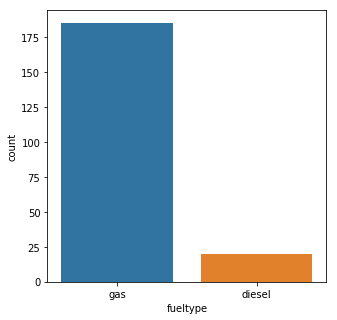

In [31]:
## Checking frequency of `fueltype`
plt.figure(figsize=(5, 5))
sns.countplot("fueltype", data = auto)
plt.show()

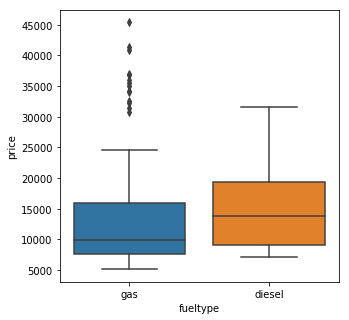

In [32]:
## Impact of fueltype
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'fueltype', y = 'price', data = auto)
plt.show()
## Looks like there are few outliers for `Gas` type fuel

##### From above boxplot its clear that diesel cars  are more costly but there are few outliers in Gasoline which has more price then diesel cars

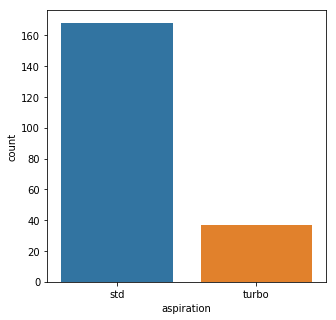

In [33]:
## Checking frequency of `aspiration`
plt.figure(figsize=(5, 5))
sns.countplot("aspiration", data = auto)
plt.show()

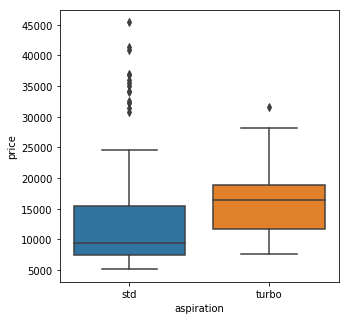

In [34]:
## Impact of aspiration
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'aspiration', y = 'price', data = auto)
plt.show()

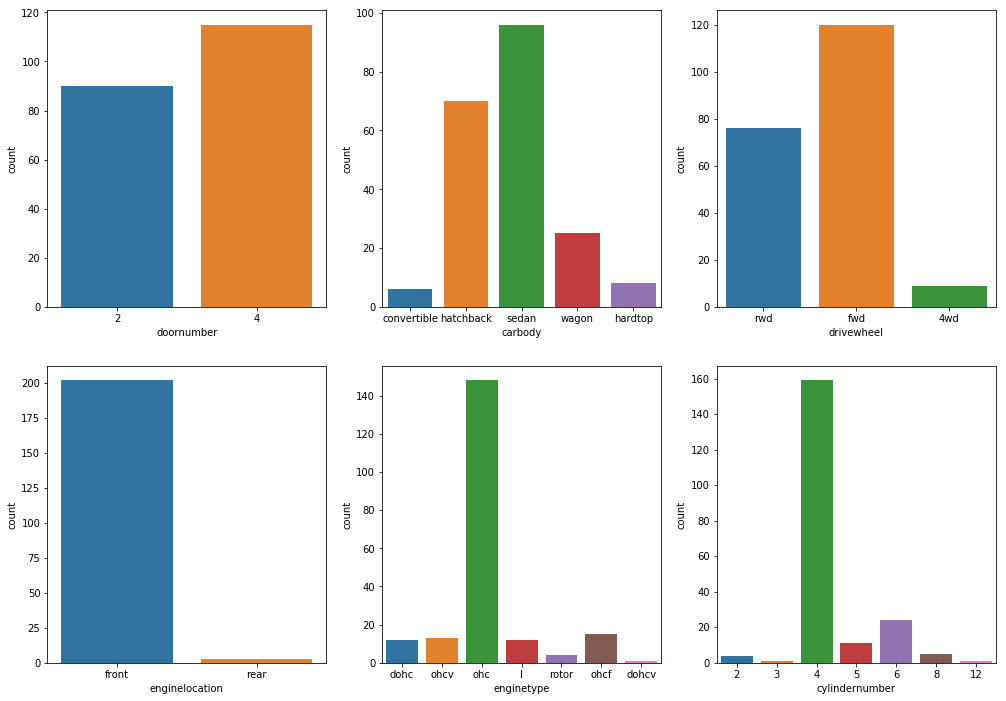

In [35]:
## Univariate Analysis
plt.figure(figsize=(17,12))
plt.subplot(2,3,1)
sns.countplot("doornumber", data = auto)
plt.subplot(2,3,2)
sns.countplot('carbody', data = auto)
plt.subplot(2,3,3)
sns.countplot('drivewheel', data = auto)
plt.subplot(2,3,4)
sns.countplot('enginelocation', data = auto)
plt.subplot(2,3,5)
sns.countplot('enginetype', data = auto)
plt.subplot(2,3,6)
sns.countplot('cylindernumber',data = auto)
plt.show()

#### Most of the cars are `front wheel drive`, has `dhc engine` and `4 cylinders`. Also most of the cars are `sedan` and `hatchback`.

#### We need to make `other` category for `car body`  and `enginetype` by clubbing few levels

In [36]:
## Treating `carbody` column
## Keeping levels `sedan` and `hatchback` as it is and putting everything to `carbody_others`
auto['carbody'] = auto['carbody'].apply(lambda x: "others" if x not in ["hatchback", "sedan"] else x)

In [37]:
## verifying the unique values of `carbody`
auto['carbody'].value_counts()

sedan        96
hatchback    70
others       39
Name: carbody, dtype: int64

In [38]:
## Treating `enginetype` column
## Keeping levels `ohc`, `ohcf`, `ohcv` as it is and putting everything to `engtype_others`
auto['enginetype'] = auto['enginetype'].apply(lambda x: "others" if x not in ["ohc", "ohcf", "ohcv"] else x)

In [39]:
## verifying the unique values of `carbody`
auto['enginetype'].value_counts()

ohc       148
others     29
ohcf       15
ohcv       13
Name: enginetype, dtype: int64

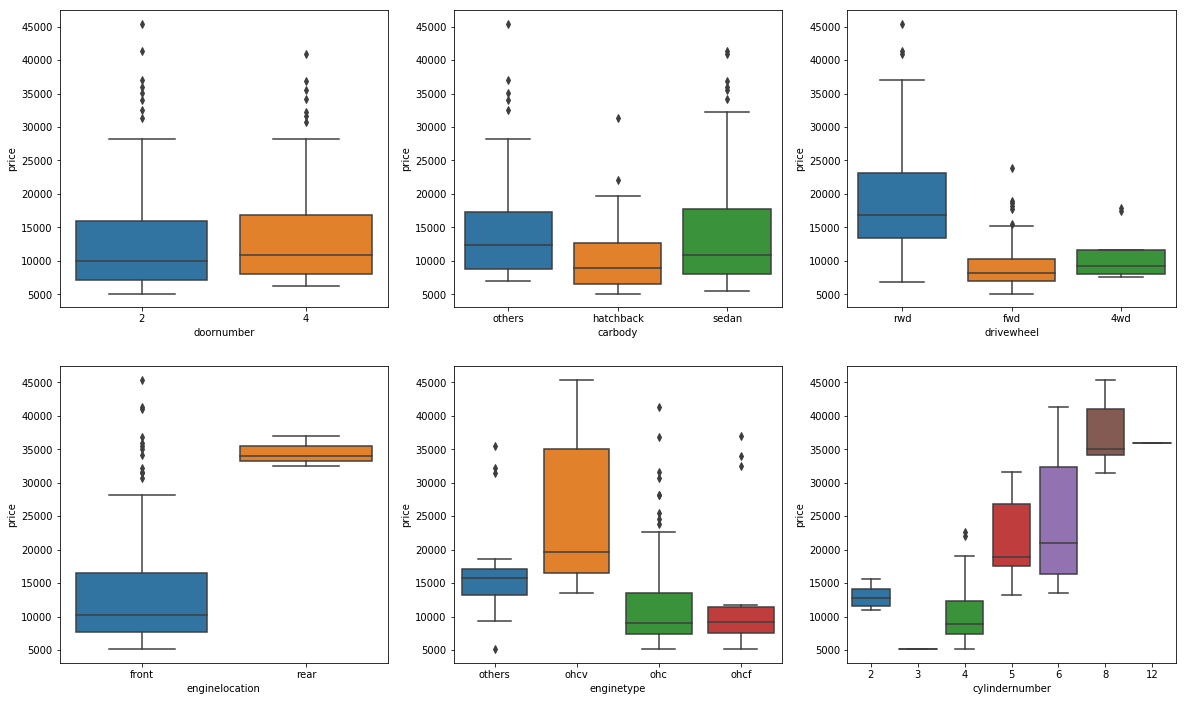

In [40]:
## Bivariate Analysis: Impact on Price
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = auto)
plt.subplot(2,3,2)
sns.boxplot(x = 'carbody', y = 'price', data = auto)
plt.subplot(2,3,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = auto)
plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = auto)
plt.subplot(2,3,5)
sns.boxplot(x = 'enginetype', y = 'price', data = auto)
plt.subplot(2,3,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = auto)
plt.show()

#### From above plots, we can say the following things:

1.) The number of doors doesn't have any significant impact on price

2.) `sedan` are the costliest body types with few exceptions in `others` as well

3.) rear wheel drive `rwd` are the costliest ones

4.) `rear engine location` are mostly the costlier ones with few outiers in `front` one

5.) `ohcv` is the costliest engine type with few exceptions in `ohc` and `ohcf`

6.)  Mostly as the `number of cylinder` increases `price` also `increases`


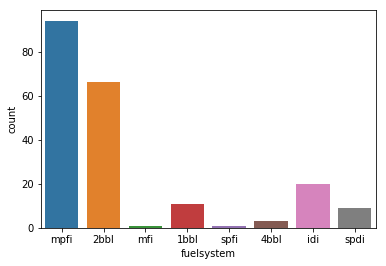

In [41]:
## Checking the fuel
sns.countplot("fuelsystem", data= auto)
plt.show()

In [42]:
## Treating this variable and clubbing few levels to form `fuelsystem_others`
## Keeping levels `mpfi`, `2bbl` and 'idi' as it is and putting everything to `carbody_others`
auto['fuelsystem'] = auto['fuelsystem'].apply(lambda x: "others" if x not in ["mpfi", "2bbl", 'idi'] else x)

In [43]:
## verifying the unique values of `carbody`
auto['fuelsystem'].value_counts()

mpfi      94
2bbl      66
others    25
idi       20
Name: fuelsystem, dtype: int64

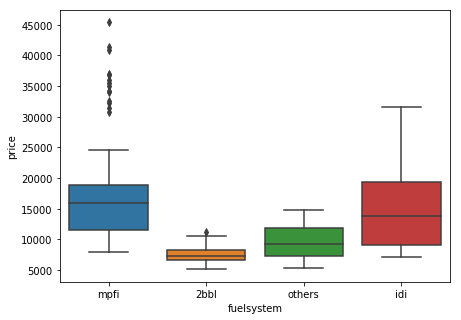

In [44]:
## Checking the Impact of Fuel system on price
plt.figure(figsize=(7, 5))
sns.boxplot(x = 'fuelsystem', y = 'price', data = auto)
plt.show()

### Data Processing

###### Generating Dummies for Categorical variables

In [45]:
## printing categorical columns
cat_cols

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [46]:
## generating the dataframe of categorical columns
## creating n-1 dummy variables for each categorical variable having `n` levels
dum_cat_cols = pd.get_dummies(auto[cat_cols], drop_first= True)

In [47]:
## Checking the top 5 rows
## Dummy variables for `symboling` was not created since it was already numeric 
dum_cat_cols.head()

,fueltype_gas,aspiration_turbo,carbody_others,carbody_sedan,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_ohcf,enginetype_ohcv,enginetype_others,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_others
0,1,0,1,0,0,1,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,0,0,1,0,1,0
2,1,0,0,0,0,1,0,0,1,0,0,1,0
3,1,0,0,1,1,0,0,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,0,0,1,0


In [48]:
## checking the shape of dummy data frame
dum_cat_cols.shape

(205, 13)

In [49]:
### dropping the old categorical columns and printing the shape
auto = auto.drop(cat_cols, axis=1)
auto.shape

(205, 17)

In [50]:
### Concatenating these columns to the data frame
auto = pd.concat([auto, dum_cat_cols], axis=1)

In [51]:
## checking the shape of dataframe
auto.shape

(205, 30)

In [52]:
auto[num_cols].head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


###### Creating derived variables

In [53]:
## calculating estimated volume of car (space required by car) using carlength, carwidth and carheight
auto["est_vol_car"] = auto["carheight"] * auto["carlength"] * auto["carwidth"]
# ## calculting ratio of engine size to horsepower
auto["engsize_hp_ratio"] = round(auto["enginesize"]/auto["horsepower"], 3)
# ## Calculating the bore/stroke ratio
# ## More is this ratio, more pwer is generataed by car
auto["bore_stroke_ratio"] = round(auto["boreratio"]/auto["stroke"], 3)
# ## Calculating difference of highwaympg/citympg
## this will tell us how much is the difference between the mileage provided by car in two different scenarios
auto["higway_city_mpg_diff"] = round(auto["highwaympg"] - auto["citympg"],3)

In [54]:
## Dropping the 9 columns which are used to create derived variables:
auto = auto.drop(["carheight", "carlength", "carwidth",\
                "enginesize", "horsepower", "boreratio", "stroke",\
                 "highwaympg", "citympg"], axis=1)

In [55]:
## printing the shape of dataframe
auto.shape

(205, 25)

In [56]:
auto.columns

Index(['symboling', 'doornumber', 'wheelbase', 'curbweight', 'cylindernumber',
       'compressionratio', 'peakrpm', 'price', 'fueltype_gas',
       'aspiration_turbo', 'carbody_others', 'carbody_sedan', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_others', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_others', 'est_vol_car',
       'engsize_hp_ratio', 'bore_stroke_ratio', 'higway_city_mpg_diff'],
      dtype='object')

<Figure size 3600x3600 with 0 Axes>

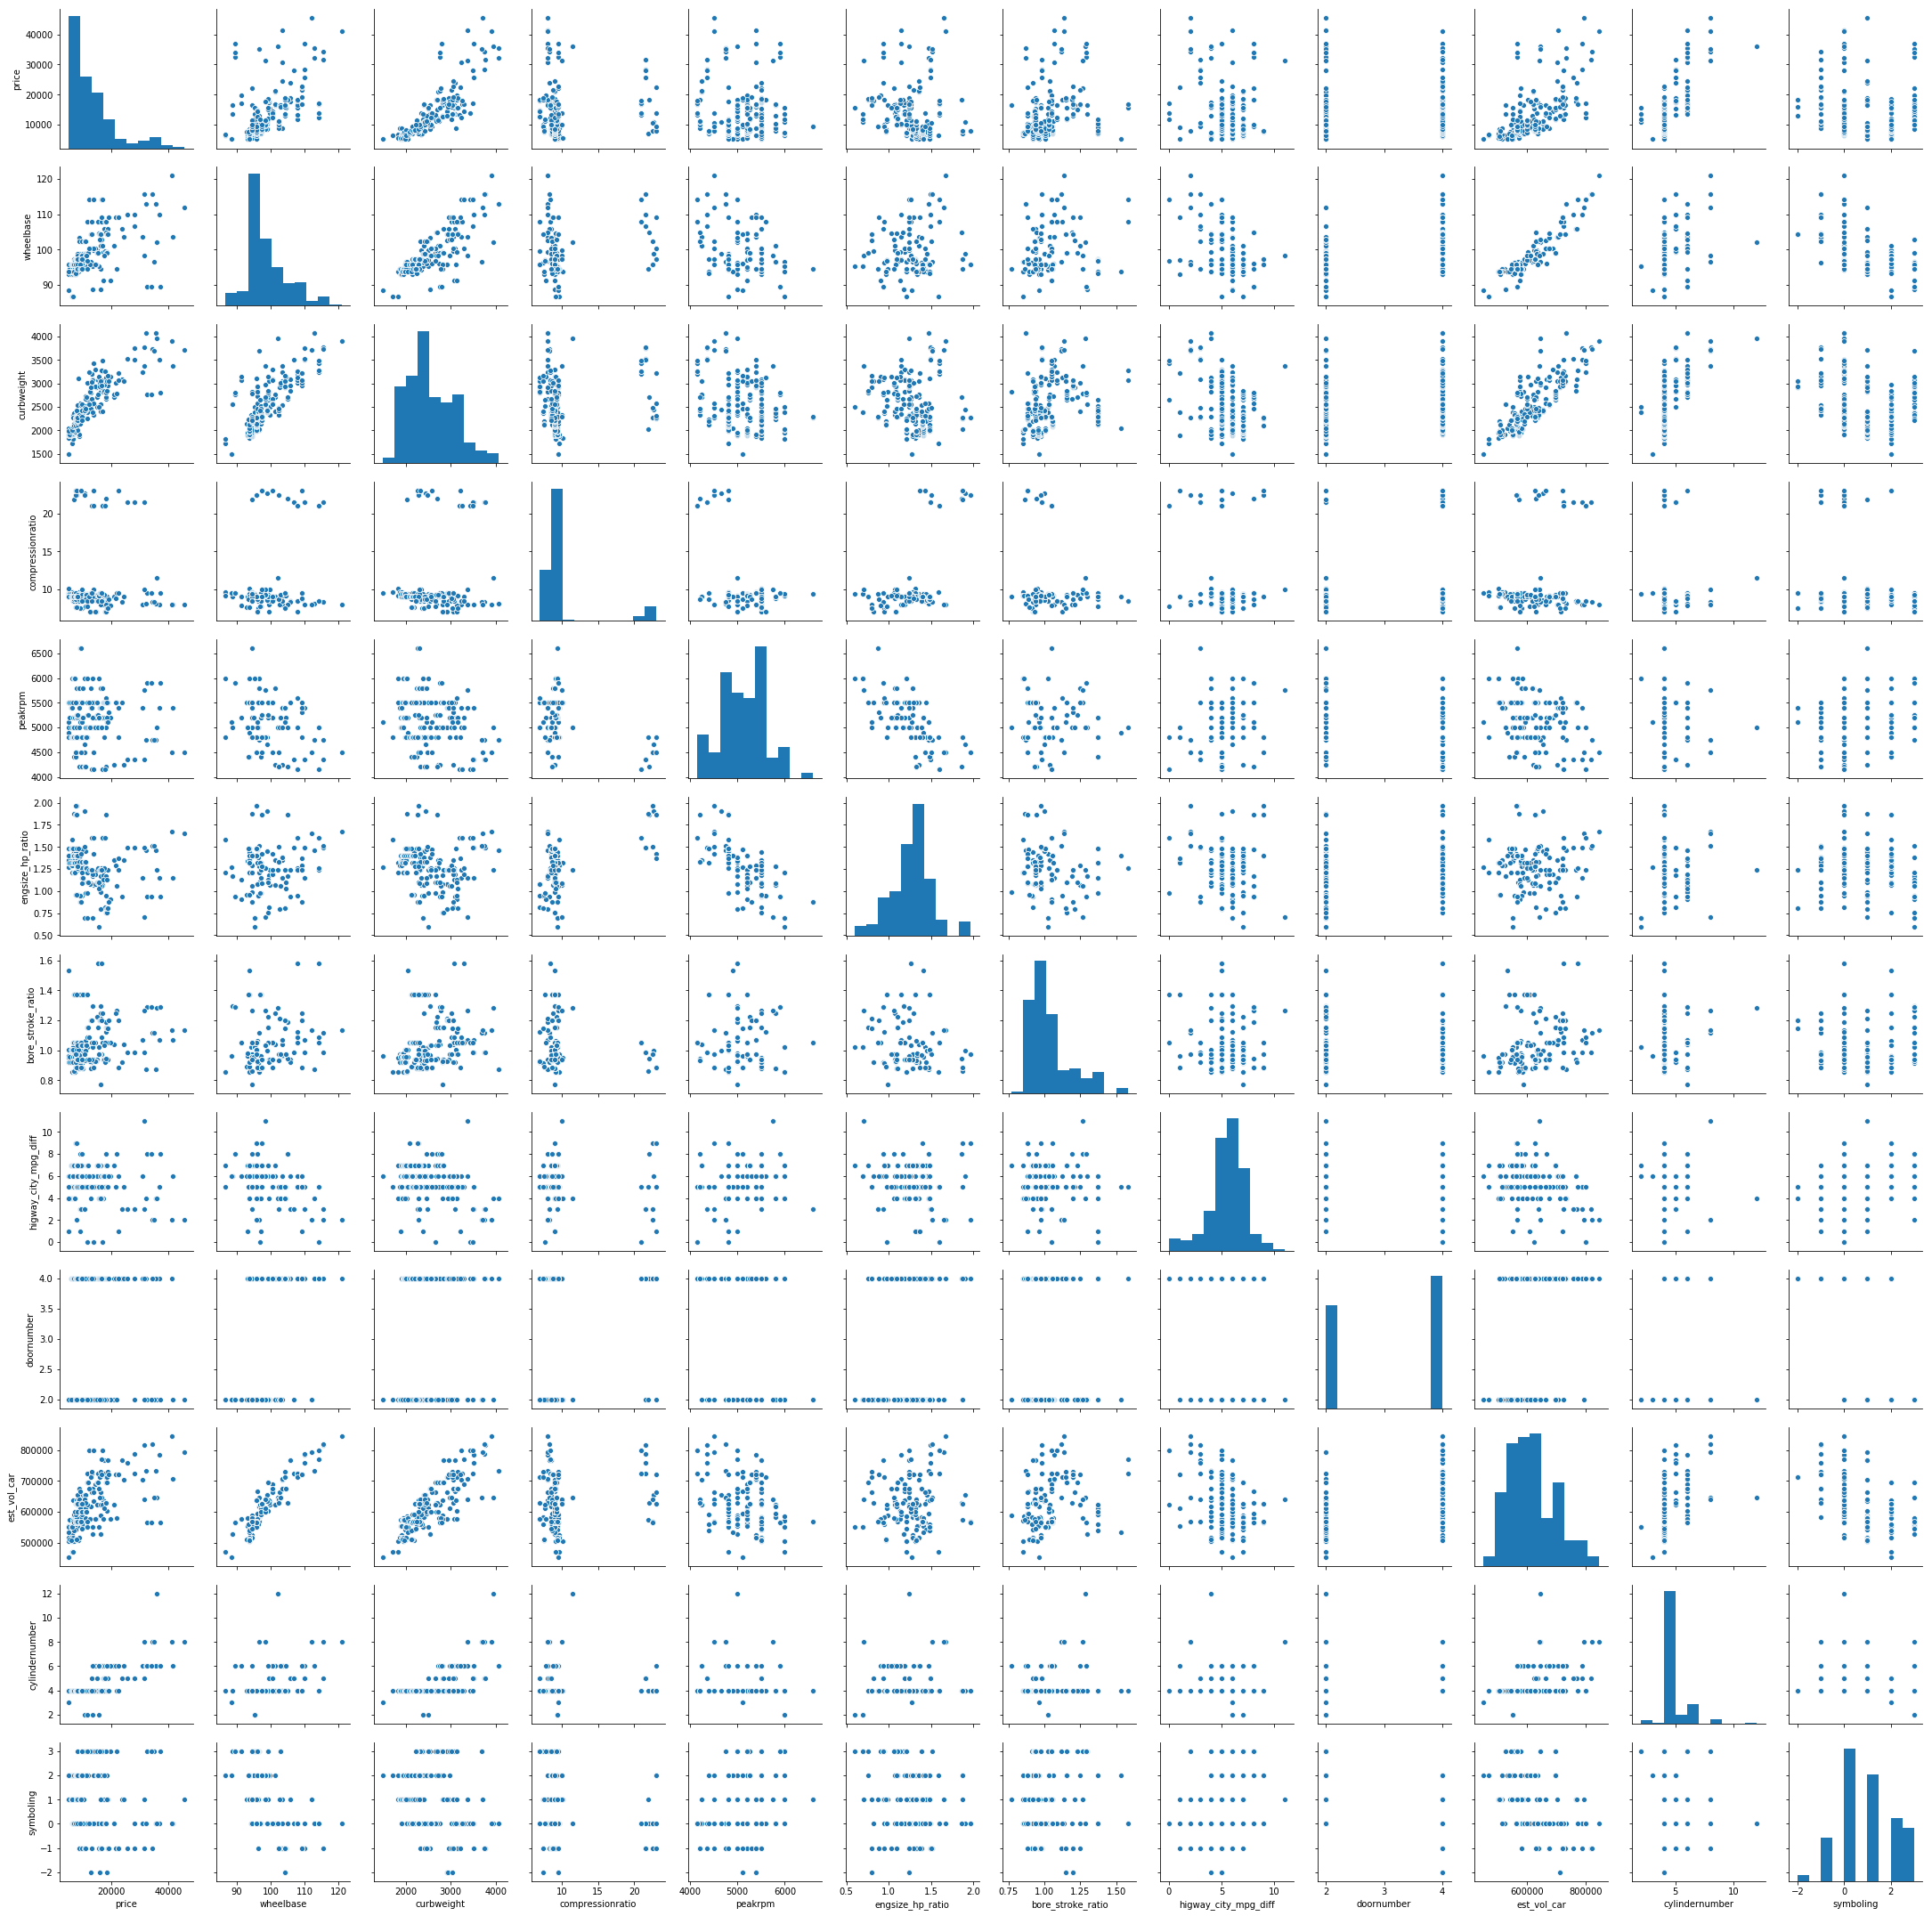

In [57]:
## Plotting the pairplot between price and other numeric variables
num_cols = ["price", "wheelbase", "curbweight", "compressionratio", "peakrpm", "engsize_hp_ratio",
           "bore_stroke_ratio", "higway_city_mpg_diff",  "doornumber", "est_vol_car", "cylindernumber", "symboling"]

plt.figure(figsize=(50,50))
sns.pairplot(auto, vars=num_cols)
plt.show()

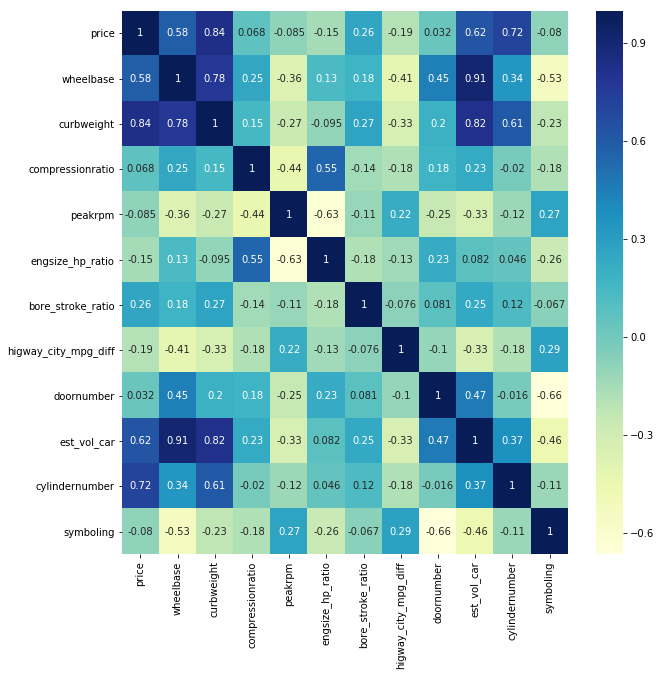

In [58]:
## Plotting the correlation matrix as well with new derived variables
plt.figure(figsize=(10,10))
sns.heatmap(auto[num_cols].corr(),annot = True, cmap="YlGnBu")
plt.show()

### From above plots:

1.) `est_vol_car` and `wheelbase`, `boreratio` has moderate postive correlation with price

2.) `curbweight`, `enginesize`, `horsepower` has high positive correlation with price


#### Dividing the data into train and test

In [59]:
train, test = train_test_split(auto, train_size = 0.75, random_state = 742764) 

In [60]:
## Checking shape of train and test
print(train.shape)
print(test.shape)

(153, 25)
(52, 25)


#### Scaling the train data

In [61]:
## scaling
scaler = MinMaxScaler()
scaler.fit(train[num_cols])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [62]:
## Transforming the data
train[num_cols] = scaler.transform(train[num_cols])

In [63]:
## verifying the scaling by checking the summaru of columns
train[num_cols].describe()
## So for all the columns values are between 0 and 1

,price,wheelbase,curbweight,compressionratio,peakrpm,engsize_hp_ratio,bore_stroke_ratio,higway_city_mpg_diff,doornumber,est_vol_car,cylindernumber,symboling
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.233371,0.361726,0.421247,0.208133,0.396425,0.494897,0.245957,0.496138,0.555556,0.429770,0.241176,0.566013
std,0.223928,0.182390,0.212719,0.259359,0.201102,0.174476,0.187517,0.145240,0.498536,0.207051,0.111526,0.251093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.073404,0.230321,0.254849,0.100000,0.265306,0.404814,0.116919,0.454545,0.000000,0.289420,0.200000,0.400000
50%,0.156836,0.309038,0.363460,0.125000,0.428571,0.505470,0.202201,0.545455,1.000000,0.421435,0.200000,0.600000
75%,0.325497,0.460641,0.594259,0.150000,0.551020,0.592998,0.287483,0.545455,1.000000,0.568834,0.200000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
## splittingthe data between independent and dependent variable
y_train = train["price"]
x_train = train.drop("price", axis = 1)

In [65]:
## printing the shape of x_train
print(x_train.shape)

(153, 24)


### Using RFE to select top 10 features

In [66]:
## Building model using sklearn
lr = LinearRegression()
# lr.fit(x_train, y_train)
rfe = RFE(lr, 10)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [67]:
col = list(x_train.columns[rfe.support_])
col

['wheelbase',
 'curbweight',
 'cylindernumber',
 'compressionratio',
 'peakrpm',
 'fueltype_gas',
 'enginelocation_rear',
 'enginetype_ohcv',
 'fuelsystem_idi',
 'higway_city_mpg_diff']

In [68]:
#### Making these columns as fixed from above results of RFE since if its run on different PC, 
#### top 10 features provided by RFE might change. In case if there is slight change in above results of RFE while 
#### running, please ignore since this is the output for top 10 features in my laptop and the below modelling process
#### is done based on that

col = ['symboling',
 'wheelbase',
 'curbweight',
 'cylindernumber',
 'peakrpm',
 'drivewheel_rwd',
 'enginelocation_rear',
 'enginetype_ohcv',
 'enginetype_others',
 'engsize_hp_ratio']

In [69]:
## Creating the final train set with required columns
x_train = x_train[col]

In [70]:
## printing shape of final x_train
print(x_train.shape)

(153, 10)


### Building 1st model of Linear Regression using 10 available features

In [71]:
### Building 1st model
x_train_c = sm.add_constant(x_train)
lm_1 = sm.OLS(y_train, x_train_c).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     83.74
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.86e-54
Time:                        14:38:30   Log-Likelihood:                 160.09
No. Observations:                 153   AIC:                            -298.2
Df Residuals:                     142   BIC:                            -264.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3144    

In [72]:
# Calculate the VIFs for the 1st model
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,32.61
1,wheelbase,25.19
3,cylindernumber,14.23
9,engsize_hp_ratio,9.45
0,symboling,8.10
4,peakrpm,5.18
5,drivewheel_rwd,3.37
8,enginetype_others,1.85
7,enginetype_ohcv,1.80
6,enginelocation_rear,1.27


###### `wheelbase` variable has very high VIF  and is almost insignificant

In [73]:
## dropping wheelbase 
x_train.drop("wheelbase", axis=1, inplace=True)
x_train_c = sm.add_constant(x_train)
lm_2 = sm.OLS(y_train, x_train_c).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     91.25
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           9.29e-55
Time:                        14:38:30   Log-Likelihood:                 158.36
No. Observations:                 153   AIC:                            -296.7
Df Residuals:                     143   BIC:                            -266.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2926    

In [74]:
# Calculate the VIFs for the 2nd model
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,cylindernumber,13.76
1,curbweight,12.61
0,symboling,6.30
8,engsize_hp_ratio,6.11
3,peakrpm,4.74
4,drivewheel_rwd,3.37
7,enginetype_others,1.81
6,enginetype_ohcv,1.70
5,enginelocation_rear,1.19


##### Dropping `cylindernumber` variable since its  has high VIF

In [75]:
## dropping cylindernumber variable
x_train.drop("cylindernumber", axis=1, inplace=True)
x_train_c = sm.add_constant(x_train)
lm_4 = sm.OLS(y_train, x_train_c).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     75.56
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.04e-47
Time:                        14:38:31   Log-Likelihood:                 138.45
No. Observations:                 153   AIC:                            -258.9
Df Residuals:                     144   BIC:                            -231.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2628    

In [76]:
# Calculate the VIFs for the 3rd model
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,8.34
0,symboling,6.27
7,engsize_hp_ratio,5.37
2,peakrpm,4.44
3,drivewheel_rwd,3.37
6,enginetype_others,1.74
5,enginetype_ohcv,1.31
4,enginelocation_rear,1.14


#### Dropping `engsize_hp_ratio` since it has HIGH VIF as well as its insignificant

In [77]:
# dropping engsize_hp_ratio variable
x_train.drop("engsize_hp_ratio", axis=1, inplace=True)
x_train_c = sm.add_constant(x_train)
lm_5 = sm.OLS(y_train, x_train_c).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     86.79
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.20e-48
Time:                        14:38:31   Log-Likelihood:                 138.33
No. Observations:                 153   AIC:                            -260.7
Df Residuals:                     145   BIC:                            -236.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2326    

In [78]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,5.66
0,symboling,5.00
2,peakrpm,4.42
3,drivewheel_rwd,3.30
6,enginetype_others,1.60
5,enginetype_ohcv,1.24
4,enginelocation_rear,1.10


#### Dropping  `symboling` column since it has high VIF and its almost insignifncat

In [79]:
## dropping symboling variable
x_train.drop("symboling", axis=1, inplace=True)
x_train_c = sm.add_constant(x_train)
lm_6 = sm.OLS(y_train, x_train_c).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.23e-49
Time:                        14:38:31   Log-Likelihood:                 137.62
No. Observations:                 153   AIC:                            -261.2
Df Residuals:                     146   BIC:                            -240.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2065    

In [80]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,4.97
2,drivewheel_rwd,3.23
1,peakrpm,2.38
5,enginetype_others,1.59
4,enginetype_ohcv,1.24
3,enginelocation_rear,1.09


#### Dropping `enginetype_ohcv` variable since its highly insignificant

In [81]:
## dropping enginetype_ohcv variable
x_train.drop("enginetype_ohcv", axis=1, inplace=True)
x_train_c = sm.add_constant(x_train)
lm_7 = sm.OLS(y_train, x_train_c).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.17e-50
Time:                        14:38:31   Log-Likelihood:                 137.49
No. Observations:                 153   AIC:                            -263.0
Df Residuals:                     147   BIC:                            -244.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2023    

In [82]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,4.51
2,drivewheel_rwd,3.23
1,peakrpm,2.36
4,enginetype_others,1.52
3,enginelocation_rear,1.09


#### This will be our final  model where we are able to explain around 83% of variance in `Price` with the help of  `5 Independent` variables

#### The final model is given as:

##### `Price = -0.2023 + 0.8664 * Curbweight + 0.1368 * peakprm + 0.0679 * drivewheel_rwd + 0.3885 *  enginelocation_rear - 0.0963 * enginetype_others'

where `enginelocation_rear = 1` implies engine is in back side of car

      `enginelocation_rear = 0` implies engine is in front
      
      `enginetype_others = 1` implies any engine apart from `ohc`, `ohcf` and `ohcv`

##### All the 5 features are highly significant since they have p-values way below than 0.05 and VIF less then 5

##### Also the P-value of F-statistic is very less indicating that whole model is significant 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
y_train_price = lm_7.predict(x_train_c)

Text(0.5, 0, 'Errors')

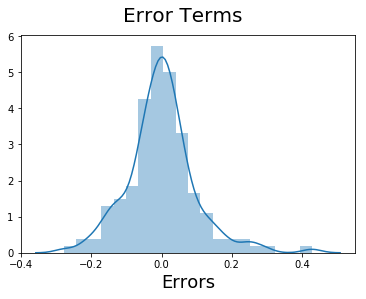

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

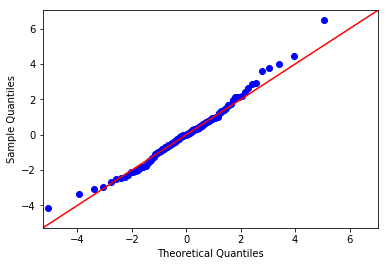

In [85]:
## Checking the QQ Plot as well
fig = sm.qqplot((y_train - y_train_price),stats.t, fit=True, line='45')
plt.show()

#### This shows that error terms are approximately normally distributed with mean around `0`

In [86]:
## Checking the sum of error terms
round(np.sum(y_train - y_train_price),4)

0.0

In [87]:
### Checking the Mean of Error Terms
round(np.mean(y_train - y_train_price),4)

0.0

Text(0, 0.5, 'Errors')

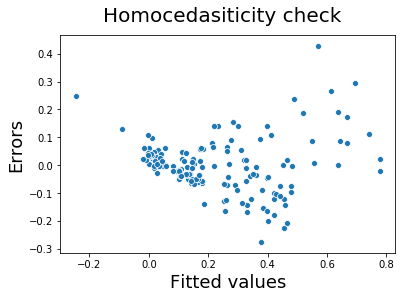

In [88]:
# Plot the scatter plot of the error terms vs fitted values
error = y_train - y_train_price
fig = plt.figure()
sns.scatterplot(x = y_train_price, y= error)
fig.suptitle('Homocedasiticity check', fontsize = 20) 
plt.xlabel('Fitted values', fontsize = 18) 
plt.ylabel('Errors', fontsize = 18) 

#### Conclusion of Residual Analysis

1.) Sum of all the Error term is 0

2.) Error is also approximately normally distributed with centre as `0`

3.) The distribution of error is also random which shows that residuals have constant variance

### Note: The dataset is very small on which the model is trained. So, there are slight chances that assumptions are not satisfied exactly but approximately

## Making Predictions on Test Set

In [89]:
## Transforming the test data using the scaler object fitted on training set
test[num_cols] = scaler.transform(test[num_cols])

In [90]:
## Filtering the columns we need for prediction
x_test = test[list(x_train.columns)]
y_test = test["price"]
x_test_c = sm.add_constant(x_test)

In [91]:
## Making the prediction using final model
y_test_pred = lm_7.predict(x_test_c)

##### R-Squared for Test Data

In [92]:
## Calculating R-square on Test Data Set
print(round(r2_score(y_test, y_test_pred),2))

0.79


#### We get Adjusted R-squared of 0.8 on training set and R-squared of 0.79 on Test set. This shows that our model was able to generalise well on unseen data

### Business Interpretation

#### The major factors which help in determining the price of car and explaining around 78% variance are:

1.) Maximum RPM of car (`peakrpm`). This can indirectly impact the mileage, acceleration provided by car.

2.) Curb Weight of car (`curbweight`). This generally increases with increase in size of car, as the size of engine increases, number of doors, number of cylinders

3.) Position of Engine (`enginelocation`). Its seen that if engine is located at beack side of car which generally happens in premium vehicles, price increases drastically.

4.) Driving wheels (`drivewheel_rwd`). The rear wheel drive wheels are costlier as compared to others, it was quite clear from box plot as well.

5.) Engine type (`enginetype_others`): The engines except `ohcf`, `ohc` and `ohcv` are less expensive with outliers. This is the reason it has negative coefficient 

In [93]:
## Printing the R-squared of Test Data
print(round(r2_score(y_test, y_test_pred),2))

0.79
